# Initialize Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ROOT
import uproot
import os
import sys
import tqdm
import pandas as pd
import pickle as pkl

%jsroot on
# %matplotlib qt
%matplotlib inline

Welcome to JupyROOT 6.30/02


In [2]:
sys.path.append('../python/')
from filterMethods import *
from hitAccuracyMethods import *
from statisticsMethods import *
from importMethods import *
from constants import *
import plotParameters

In [3]:
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

# Load Data

In [4]:
# fileName = '../runs/event_2mu100MeVBackToBack_usedForTrackReconstruction.root'
# fileName = '../runs/calibration_2.42^3_10000gamma_1000events.root'
fileName = '../runs/calibration_2.42^3_10000gamma_1000events_0cmFOVL.root'
# fileName = '../runs/calibration_2.42^3_10000gamma_1000events_20cmFOVL.root'
# fileName = '../build/calibration.root'
# fileName = '../build/event100.root'

histDir = '/photoSensor_hits_histograms'

print(get_histogram_names    (fileName, histDir))
print(get_histogram_titles   (fileName, histDir))
print(get_histogram_positions(fileName, histDir))
print(get_histogram_walls    (fileName, histDir))

['photoSensor_0;1', 'photoSensor_1;1', 'photoSensor_2;1', 'photoSensor_3;1', 'photoSensor_4;1', 'photoSensor_5;1', 'photoSensor_6;1', 'photoSensor_7;1', 'photoSensor_8;1', 'photoSensor_9;1', 'photoSensor_10;1', 'photoSensor_11;1', 'photoSensor_12;1', 'photoSensor_13;1', 'photoSensor_14;1', 'photoSensor_15;1', 'photoSensor_16;1', 'photoSensor_17;1', 'photoSensor_18;1', 'photoSensor_19;1', 'photoSensor_20;1', 'photoSensor_21;1', 'photoSensor_22;1', 'photoSensor_23;1', 'photoSensor_24;1', 'photoSensor_25;1', 'photoSensor_26;1', 'photoSensor_27;1', 'photoSensor_28;1', 'photoSensor_29;1', 'photoSensor_30;1', 'photoSensor_31;1', 'photoSensor_32;1', 'photoSensor_33;1', 'photoSensor_34;1', 'photoSensor_35;1', 'photoSensor_36;1', 'photoSensor_37;1', 'photoSensor_38;1', 'photoSensor_39;1', 'photoSensor_40;1', 'photoSensor_41;1', 'photoSensor_42;1', 'photoSensor_43;1', 'photoSensor_44;1', 'photoSensor_45;1', 'photoSensor_46;1', 'photoSensor_47;1', 'photoSensor_48;1', 'photoSensor_49;1', 'photoSen

In [5]:
treeName_photoSensor = 'photoSensor_hits;1'
treeName_lens        = 'lens_hits;1'
nBins_x = 15
nBins_y = 15
df_hits = pd.DataFrame(columns=['sensor_name', 'sensor_direction', 'sensor_position', 'relativePosition', 'relativePosition_binned', 'time'])
df_hits['sensor_name'                        ] = get_photosensor_hits_photosensor_ID              (fileName, treeName_photoSensor)
df_hits['sensor_direction'                   ] = get_photosensor_hits_photosensor_direction       (fileName, treeName_photoSensor)
df_hits['sensor_position'                    ] = get_photosensor_hits_photosensor_position        (fileName, treeName_photoSensor)
df_hits['sensor_wall'                        ] = get_photosensor_hits_photosensor_wall            (fileName, treeName_photoSensor)
df_hits['relativePosition'                   ] = get_photosensor_hits_position_relative           (fileName, treeName_photoSensor)
# df_hits['relativePosition'                   ] = fixRotations(np.array(df_hits['relativePosition'].to_list()), 
#                                                               np.array(df_hits['sensor_wall'].to_list()))
df_hits['relativePosition_binned'            ] = get_photosensor_hits_position_relative_binned    (fileName, treeName_photoSensor, histDir,
                                                                                                #    x=np.array(df_hits['relativePosition'].to_list())[:,0],
                                                                                                #    y=np.array(df_hits['relativePosition'].to_list())[:,1]),
                                                                                                    nBins_x=nBins_x, nBins_y=nBins_y)
df_hits['relativePosition_nBin'              ] = get_photosensor_hits_position_relative_nBin      (fileName, treeName_photoSensor, histDir
                                                                                                #    x=np.array(df_hits['relativePosition'].to_list())[:,0],
                                                                                                #    y=np.array(df_hits['relativePosition'].to_list())[:,1]),
                                                                                                    ,nBins_x=nBins_x, nBins_y=nBins_y)
for i in range(10):
    print(df_hits['relativePosition'].to_list()[i], df_hits['relativePosition_binned'].to_list()[i], df_hits['relativePosition_nBin'].to_list()[i])
df_hits['absolutePosition'                   ] = get_photosensor_hits_position_absolute           (fileName, treeName_photoSensor)
df_hits['initialPosition'                    ] = get_photosensor_hits_position_initial            (fileName, treeName_photoSensor)
df_hits['time'                               ] = get_photosensor_hits_time                        (fileName, treeName_photoSensor)


df_hits['direction_relative'                 ] = get_photosensor_hits_direction_relative     (fileName, treeName_photoSensor)
df_hits['direction_relative_lens_0'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 0)
df_hits['position_relative_lens_0'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 0)
df_hits['direction_relative_lens_1'          ] = get_photosensor_hits_direction_relative_lens(fileName, treeName_photoSensor, 1)
df_hits['position_relative_lens_1'           ] = get_photosensor_hits_position_relative_lens (fileName, treeName_photoSensor, 1)

df_hits['direction_relative'                 ] = fixRotations(np.array(df_hits['direction_relative'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['direction_relative_lens_0'          ] = fixRotations(np.array(df_hits['direction_relative_lens_0'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['position_relative_lens_0'           ] = fixRotations(np.array(df_hits['position_relative_lens_0'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['direction_relative_lens_1'          ] = fixRotations(np.array(df_hits['direction_relative_lens_1'].to_list()), np.array(df_hits['sensor_wall'].to_list()))
df_hits['position_relative_lens_1'           ] = fixRotations(np.array(df_hits['position_relative_lens_1'].to_list()), np.array(df_hits['sensor_wall'].to_list()))

df_hits = df_hits[df_hits['direction_relative_lens_0'] != (0, 0, 0)]
df_hits = df_hits[df_hits['direction_relative_lens_1'] != (0, 0, 0)]
df_hits = df_hits[df_hits['position_relative_lens_0' ] != (0, 0, 0)]
df_hits = df_hits[df_hits['position_relative_lens_1' ] != (0, 0, 0)]

df_hits['direction_relative_lens_0_theta'    ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
df_hits['direction_relative_lens_0_phi'      ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_lens_0_phi'       ] = df_hits['position_relative_lens_0' ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['direction_relative_lens_1_theta'    ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
df_hits['direction_relative_lens_1_phi'      ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_lens_1_phi'       ] = df_hits['position_relative_lens_1' ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['direction_relative_phi'             ] = df_hits['direction_relative'       ].apply(lambda x: np.arctan2(x[1], x[0]))
df_hits['position_relative_phi'              ] = df_hits['relativePosition'         ].apply(lambda x: np.arctan2(x[1], x[0]))

def boundAngle(angle):
    angle[angle > np.pi] -= 2*np.pi
    angle[angle < -np.pi] += 2*np.pi

    return angle

df_hits['theta_error'] = df_hits['direction_relative_lens_0_theta'] - df_hits['direction_relative_lens_1_theta']
df_hits['phi_error'  ] = df_hits['direction_relative_lens_0_phi'  ] - df_hits['direction_relative_lens_1_phi'  ]
df_hits['phi_error'  ] = boundAngle(df_hits['phi_error']).to_list()

(-3.063652270444216, 65.52311726593734, 5.0) (0.0, 65.3335) (7, 14)
(-4.016883411333205, 70.0, 3.6267467205805137) (0.0, 65.3335) (7, 14)
(-10.723437121797595, 58.500421069044705, 5.000000000000001) (-9.3335, 56.0) (6, 13)
(-27.38960928842562, 31.67055548980181, 5.000000000000002) (-28.0, 28.0) (4, 10)
(-2.9856179478676985, 33.00142061610961, 5.0) (0.0, 37.3335) (7, 11)
(-18.34747602602375, 47.85615442564813, 5.000000000000001) (-18.6665, 46.6665) (5, 12)
(-68.02511110552223, 44.907792377871026, 5.000000000000004) (-65.3335, 46.6665) (0, 12)
(-16.0545661802338, 47.0881515190099, 5.000000000000001) (-18.6665, 46.6665) (5, 12)
(-40.85642816443693, 51.093408225907744, 5.000000000000003) (-37.3335, 46.6665) (3, 12)
(-67.0296812894451, 64.9363440039982, 4.999999999999769) (-65.3335, 65.3335) (0, 14)


/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_79448/903095571.py:45: RuntimeWarning: invalid value encountered in double_scalars
  df_hits['direction_relative_lens_0_theta'    ] = df_hits['direction_relative_lens_0'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_79448/903095571.py:48: RuntimeWarning: invalid value encountered in double_scalars
  df_hits['direction_relative_lens_1_theta'    ] = df_hits['direction_relative_lens_1'].apply(lambda x: np.arccos(x[2]/np.linalg.norm(x)))
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_79448/903095571.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angle[angle > np.pi] -= 2*np.pi
/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_79448/903095571.py:56: SettingWi

# Filter Hits

In [6]:
search_radius = 0
search_number = 0

df_hits = filter_hits(df_hits, radius=search_radius, number=search_number)
print(len(df_hits))

32960


In [13]:
binned = True

def rToTheta(r):
    return r/(CM_PER_RAD*MM_PER_CM)
df_hits = make_r(df_hits, binned=binned)
df_hits = make_theta(df_hits, rToTheta, binned=binned)
df_hits = make_phi(df_hits, binned=binned)

df_hits = filter_r(df_hits, Y_LIM)

100


# Make PDF Maps

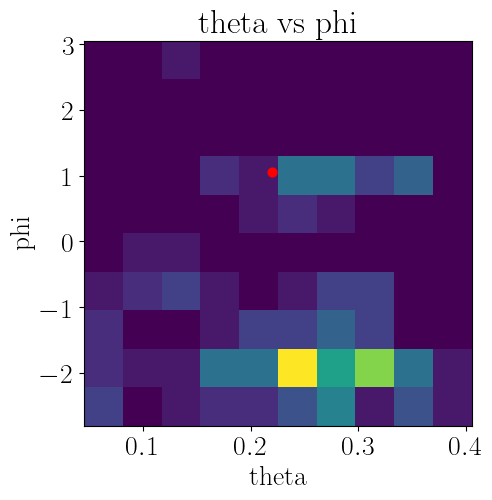

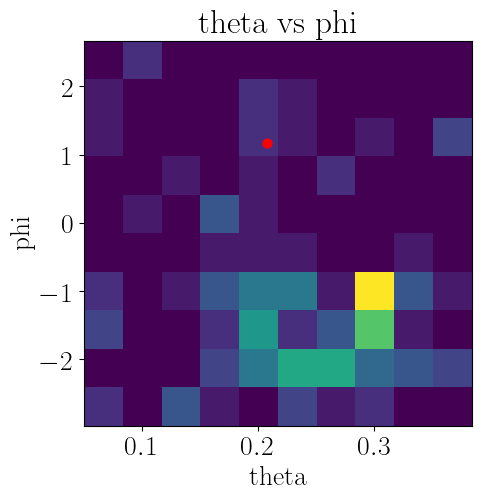

In [8]:
relativePositionBin = df_hits['relativePosition_nBin'].unique()

n = 1
lowerBound = 5
for i, bin in enumerate(relativePositionBin):
    ind     = (df_hits['relativePosition_nBin'] == bin).to_list()
    pos     = np.array(df_hits['relativePosition_binned'        ].loc[ind].to_list())
    pos     = np.unique(pos)
    phi     = np.array(df_hits['direction_relative_lens_0_phi'  ].loc[ind].to_list())
    theta   = np.array(df_hits['direction_relative_lens_0_theta'].loc[ind].to_list())
    r_r     = np.array(df_hits['r'                              ].loc[ind].to_list())
    r_r     = np.unique(r_r)
    phi_r   = np.array(df_hits['phi'                            ].loc[ind].to_list())
    phi_r   = np.unique(phi_r)
    theta_r = np.array(df_hits['theta'                          ].loc[ind].to_list())
    theta_r = np.unique(theta_r)

    if len(theta) < lowerBound:
        continue

    ind = np.isnan(theta)
    theta = theta[~ind]
    phi   = phi  [~ind]

    ind = np.isnan(phi)
    theta = theta[~ind]
    phi   = phi  [~ind]

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.hist2d(theta, phi, bins=10, norm=None, cmap='viridis')
    ax.scatter(theta_r, phi_r, color='red', s=40)
    ax.set_xlabel('theta')
    ax.set_ylabel('phi')
    ax.set_title('theta vs phi')
    plt.show()

    if i >= n and n != -1:
        break

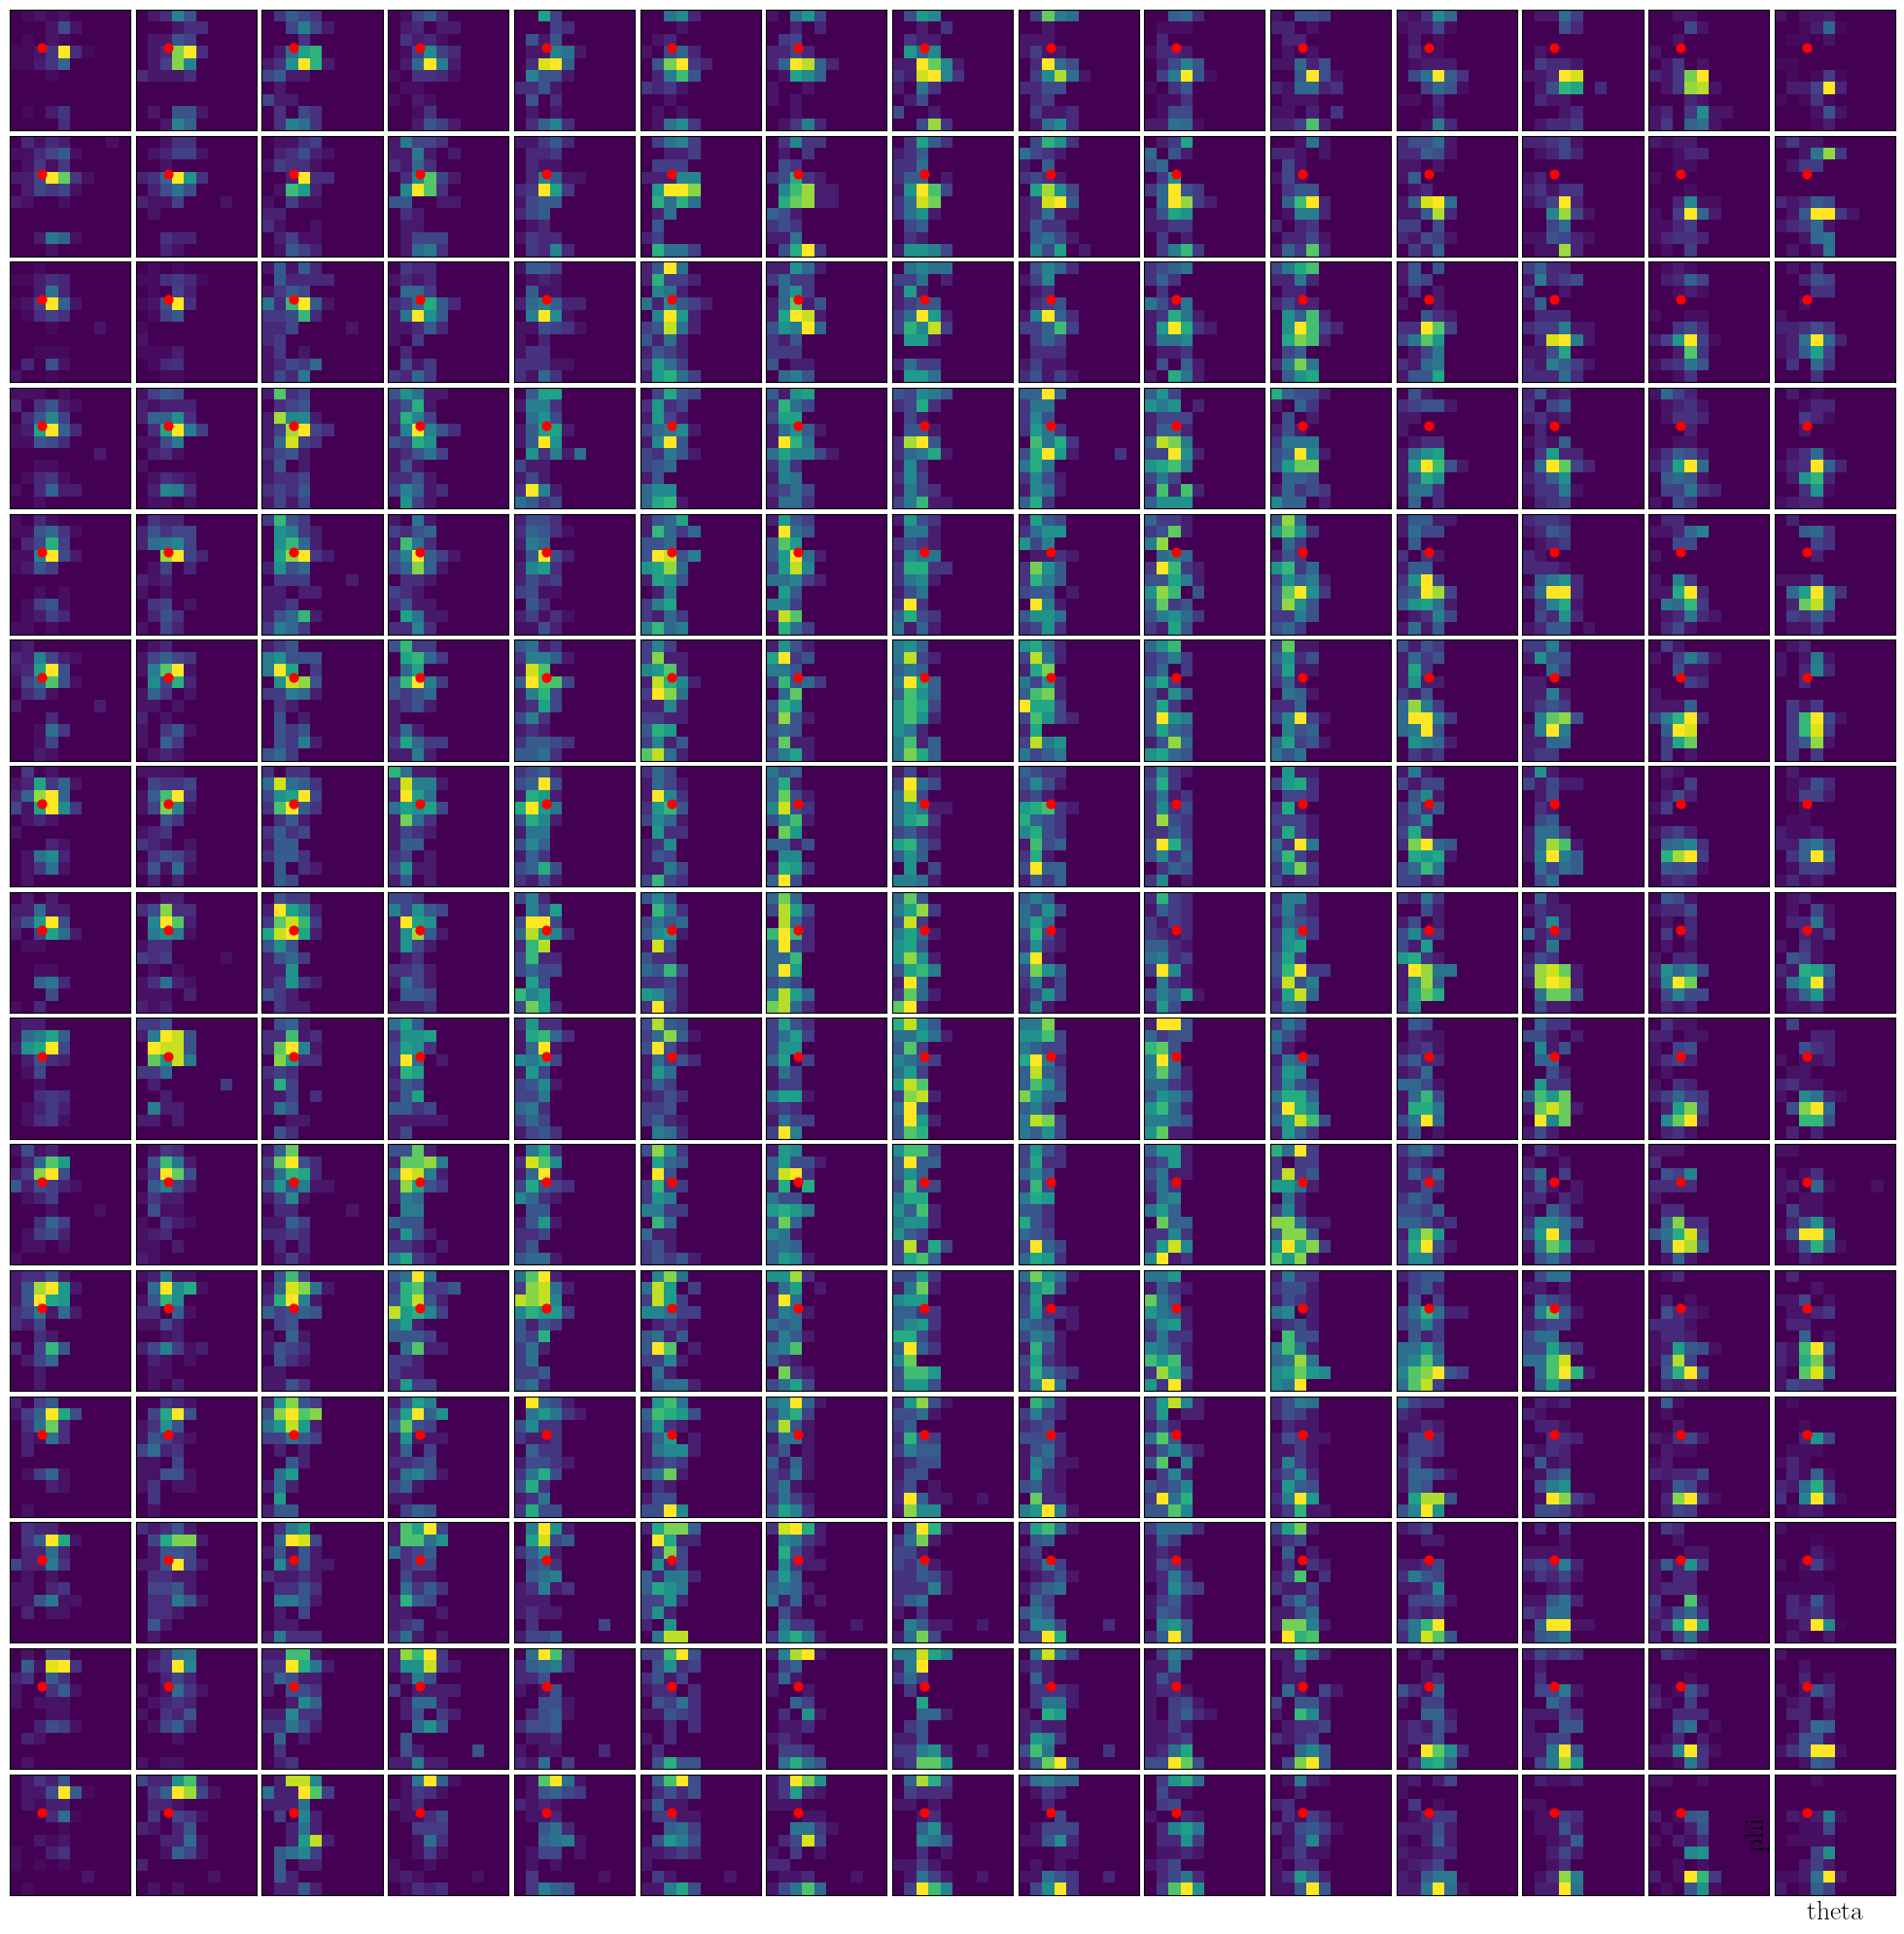

In [12]:
relativePositionBin = df_hits['relativePosition_nBin'].unique()

fig, ax = plt.subplots(nBins_x, nBins_y, figsize=(20, 20))

for nx in range(nBins_x):
    for ny in range(nBins_y):
        ind = (df_hits['relativePosition_nBin'] == (nx, ny)).to_list()
        pos = np.array(df_hits['relativePosition_binned'].loc[ind].to_list())
        pos = np.unique(pos)
        phi = np.array(df_hits['direction_relative_lens_0_phi'].loc[ind].to_list())
        theta = np.array(df_hits['direction_relative_lens_0_theta'].loc[ind].to_list())

        if len(theta) < lowerBound:
            continue

        ind = np.isnan(theta)
        theta = theta[~ind]
        phi = phi[~ind]

        ind = np.isnan(phi)
        theta = theta[~ind]
        phi = phi[~ind]

        ax[nx, ny].hist2d(theta, phi, bins=10, norm=None, cmap='viridis', range=[[0, np.pi/4], [-np.pi, np.pi]])
        ax[nx, ny].scatter(theta_r, phi_r, color='red', s=40)
        ax[nx, ny].set_xticks([])
        ax[nx, ny].set_yticks([])
        ax[nx, ny].set_xticklabels([])
        ax[nx, ny].set_yticklabels([])
        ax[nx, ny].set_xlim(0, np.pi/4)
        ax[nx, ny].set_ylim(-np.pi, np.pi)

fig.tight_layout(h_pad=0.2, w_pad=0.2)
plt.show()